In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('simulated_trades.csv')
df['stock_linear_correlated_measure'] = df['stock_linear_correlated_measure'] * 100
df.head(10)

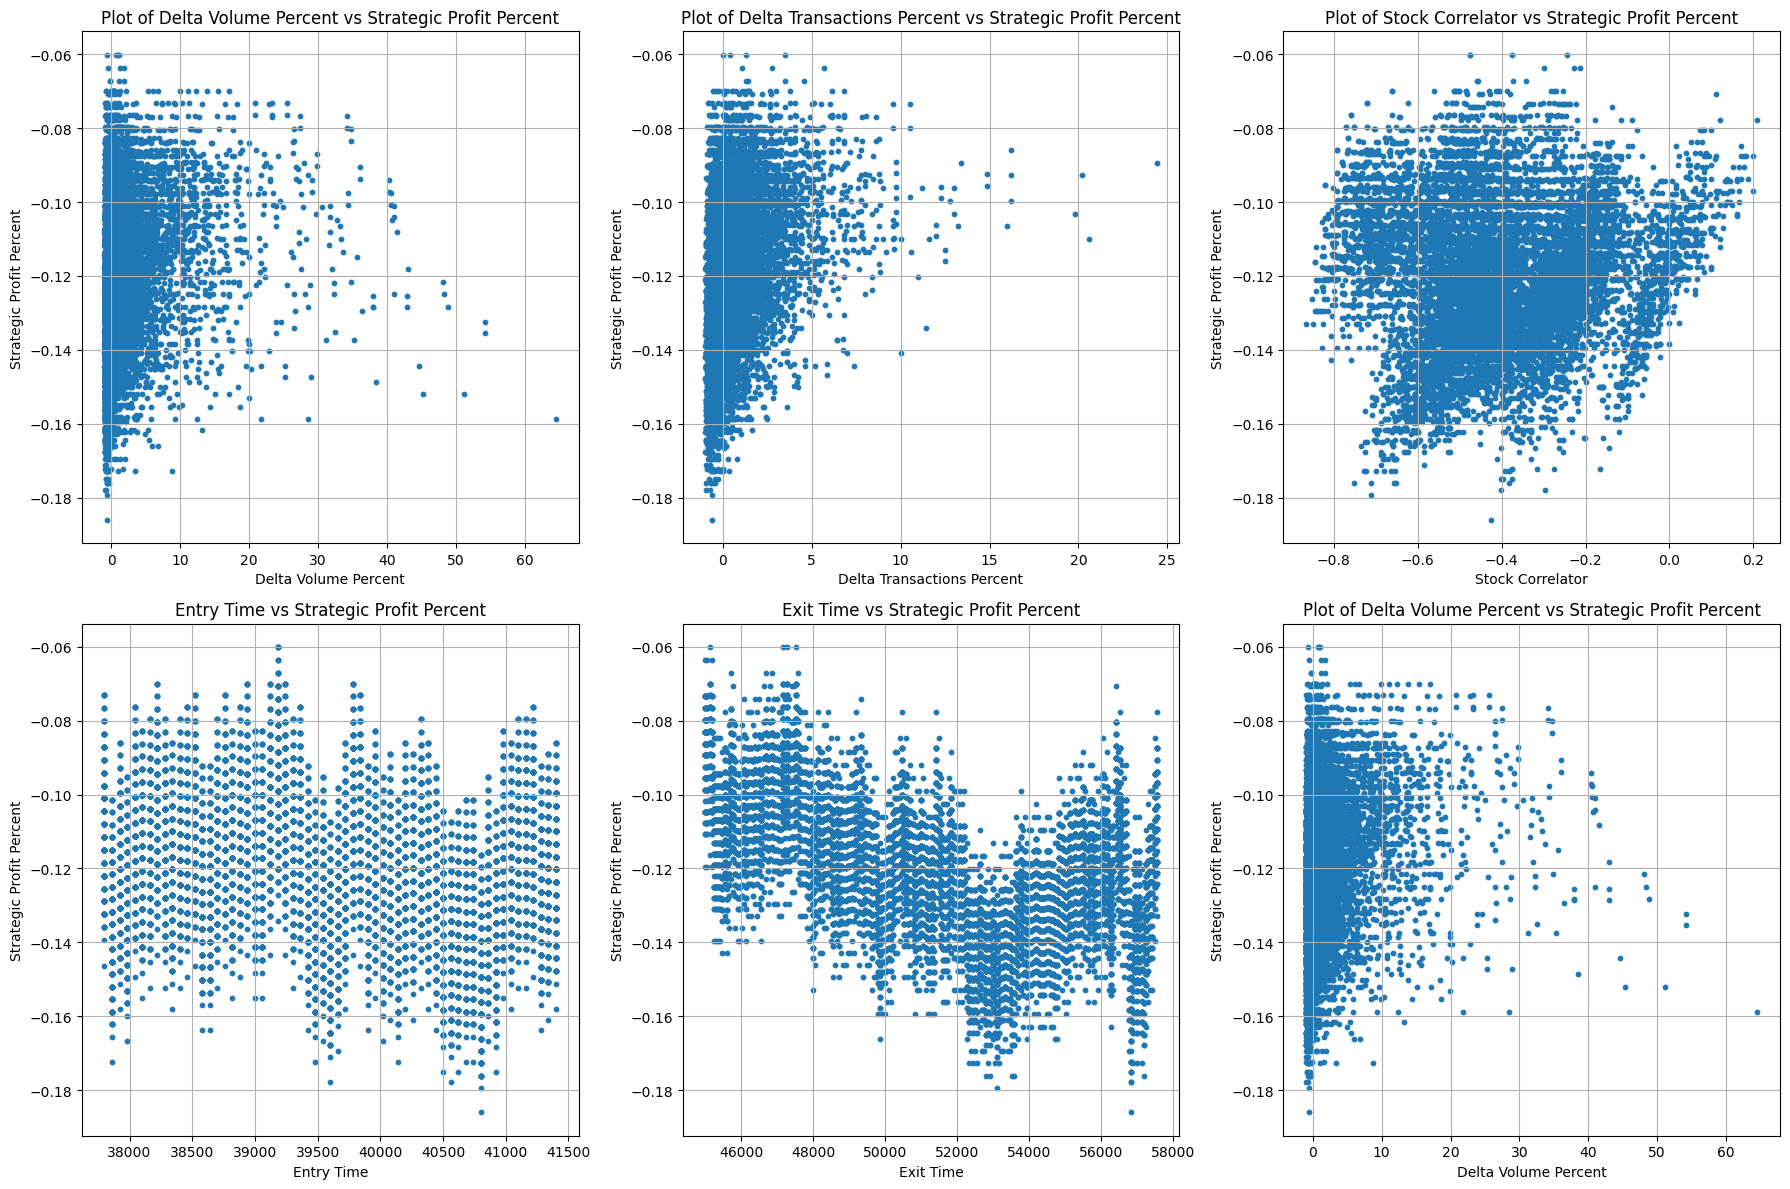

In [142]:
filtered_df = df
x1 = filtered_df['delta_volume_percent']
y1 = filtered_df['strategy_profit_percent']

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].scatter(x1, y1, s=10)
axs[0, 0].set_xlabel('Delta Volume Percent')
axs[0, 0].set_ylabel('Strategic Profit Percent')
axs[0, 0].set_title('Plot of Delta Volume Percent vs Strategic Profit Percent')
axs[0, 0].grid(True)

# Second scatter plot: Delta Transactions Percent vs Strategic Profit Percent
x2 = df['delta_transactions_percent']
y2 = df['strategy_profit_percent']

axs[0, 1].scatter(x2, y2, s=10)
axs[0, 1].set_xlabel('Delta Transactions Percent')
axs[0, 1].set_ylabel('Strategic Profit Percent')
axs[0, 1].set_title('Plot of Delta Transactions Percent vs Strategic Profit Percent')
axs[0, 1].grid(True)

# Third scatter plot: Stock Correlator vs Strategic Profit Percent
x3 = df['stock_linear_correlated_measure']
y3 = df['strategy_profit_percent']

axs[0, 2].scatter(x3, y3, s=10)
axs[0, 2].set_xlabel('Stock Correlator')
axs[0, 2].set_ylabel('Strategic Profit Percent')
axs[0, 2].set_title('Plot of Stock Correlator vs Strategic Profit Percent')
axs[0, 2].grid(True)

# Fourth scatter plot: Entry Time vs Strategic Profit Percent
x4 = df['entry_time']
y4 = df['strategy_profit_percent']

axs[1, 0].scatter(x4, y4, s=10)
axs[1, 0].set_xlabel('Entry Time')
axs[1, 0].set_ylabel('Strategic Profit Percent')
axs[1, 0].set_title('Entry Time vs Strategic Profit Percent')
axs[1, 0].grid(True)

# Fifth scatter plot: Exit Time vs Strategic Profit Percent
x5 = df['exit_time']
y5 = df['strategy_profit_percent']

axs[1, 1].scatter(x5, y5, s=10)
axs[1, 1].set_xlabel('Exit Time')
axs[1, 1].set_ylabel('Strategic Profit Percent')
axs[1, 1].set_title('Exit Time vs Strategic Profit Percent')
axs[1, 1].grid(True)

# Sixth scatter plot: Delta Volume Percent vs Strategic Profit Percent (again)
axs[1, 2].scatter(x1, y1, s=10)
axs[1, 2].set_xlabel('Delta Volume Percent')
axs[1, 2].set_ylabel('Strategic Profit Percent')
axs[1, 2].set_title('Plot of Delta Volume Percent vs Strategic Profit Percent')
axs[1, 2].grid(True)

plt.tight_layout()
plt.show()

In [143]:
# Filter correlation matrix for 'Strategyprofitpercent'
corr_matrix = df.corr()
strategy_corr = corr_matrix['strategy_profit_percent'].drop('strategy_profit_percent')

# Convert to DataFrame
strategy_corr_df = pd.DataFrame(strategy_corr)

# Rename column
strategy_corr_df.columns = ['Correlation with strategy_profit_percent']

# Display table
strategy_corr_df

,Correlation with strategy_profit_percent
entry_time,-0.218410
exit_time,-0.521975
stock_linear_correlated_measure,0.075905
delta_volume_percent,0.173146
delta_stock_volume_percent,0.133440
delta_transactions_percent,0.321199


In [144]:
strategy_corr_df = strategy_corr_df['Correlation with strategy_profit_percent'] * strategy_corr_df['Correlation with strategy_profit_percent']
strategy_corr_df

entry_time                         0.047703
exit_time                          0.272457
stock_linear_correlated_measure    0.005762
delta_volume_percent               0.029980
delta_stock_volume_percent         0.017806
delta_transactions_percent         0.103169
Name: Correlation with strategy_profit_percent, dtype: float64